In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw09_2024.ipynb")

# Homework 9: Classification via k-nearest neighbors
### Due Tuesday March 19th
# 71 pts

# **Helpful Resources:**

- [Getting help on a Jupyter Notebook](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/)

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands (worth returning to throughout this course)

- [Inferential Thinking: Classification](https://inferentialthinking.com/chapters/17/Classification.html): Good conceptual overview


In [2]:
import pandas as pd
pd.options.mode.chained_assignment=None # gets rid of setwithcopy warning
import matplotlib.pyplot as plt
import numpy as np

## Read in iris.csv  (1 pt)
Assign the dataframe to the variable `df`

In [3]:
df = pd.read_csv('iris.csv')


In [4]:
grader.check("read_in_df")

read_in_df results: All test cases passed!

## Visualizing the data (10 pts)
<img src ='iris-dataset.png' width="500px" /><br>

This week we will perform automated classification (in this case species identification) using the famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), collected by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), a remarkable and statistician and geneticist, largely responsible for development of permutation tests.

`iris.csv` contains measurements for 150 flowers.   
For each flower there are 4 numerical observations (*sepal width*, *sepal length*, *petal width*, and *petal length*) and 1 categorical observation (*class*).  
*Class* records the species of the flower. There are 3 species in this dataset: *Iris setosa*, *Iris versicolor*, and *Iris virginica*.     

To visualize the raw data, make six scatter plots, each of which plots unique pairs of numerical parameters for all 150 flowers.  
For organization purposes, make subplots on the same figure.  
   
The first row should be three scatter plots which involve sepal width (on horizontal axis in each subplot).   
The next row should be the other three parameter combinations. 
    
*Plot each species of iris as a distinct color*. Your plot should look something like this.<br>
  
<img src ='demo.svg' width="900px" /><br><br>


*Hint*: [pyplot.subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) is useful for making subplots. For instance, `fig, axs=plt.subplots(2,3)` creates six subplots with two rows and three columns.<br>
`axs[0,0].scatter(x,y)` would make scatter plot on first of these subplots.<br>


### Grading:  
  
5 pts: plotted correct x and y data for each subplot within the (2,3) subplots  
5 pts: plotted each species as a different color

<!-- BEGIN QUESTION -->



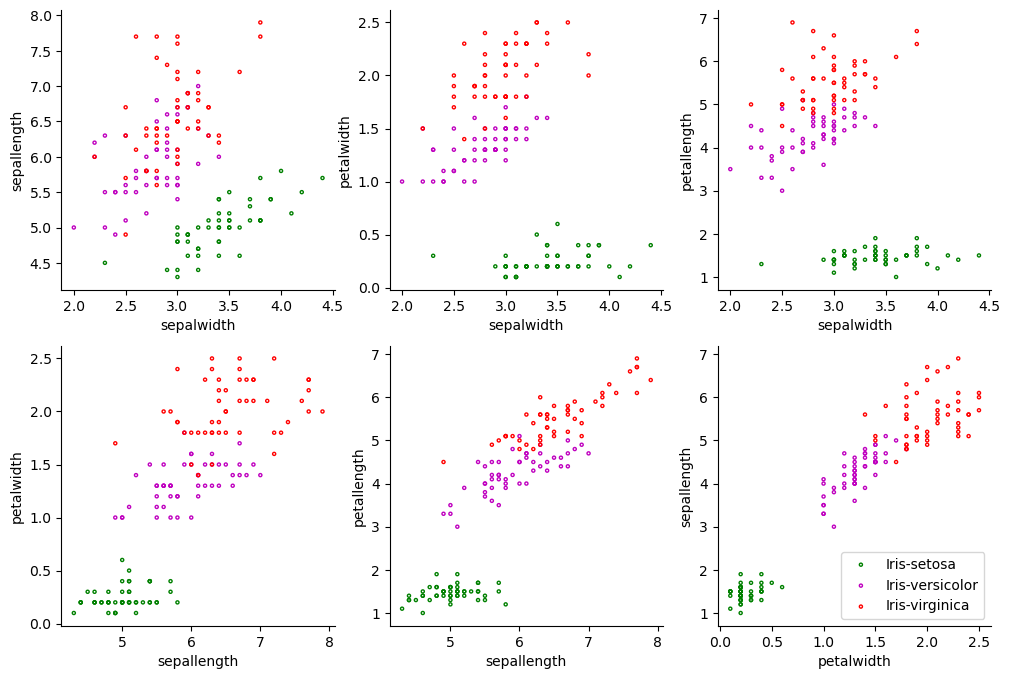

In [5]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(12, 8)

setosa_df = df[df['class'] == 'Iris-setosa']
versicolor_df = df[df['class'] == 'Iris-versicolor']
virginica_df = df[df['class'] == 'Iris-virginica']

axs[0,0].scatter(setosa_df['sepalwidth'], setosa_df['sepallength'],facecolors='none', color = 'g', s = 5)
axs[0,0].scatter(versicolor_df['sepalwidth'], versicolor_df['sepallength'],facecolors='none', color = 'm', s = 5)
axs[0,0].scatter(virginica_df['sepalwidth'], virginica_df['sepallength'],facecolors='none', color = 'r', s = 5)
axs[0,0].set_xlabel('sepalwidth')
axs[0,0].set_ylabel('sepallength')
axs[0,0].spines[['top','right']].set_visible(False)

axs[0,1].scatter(setosa_df['sepalwidth'], setosa_df['petalwidth'],facecolors='none', color = 'g', s = 5)
axs[0,1].scatter(versicolor_df['sepalwidth'], versicolor_df['petalwidth'],facecolors='none', color = 'm', s = 5)
axs[0,1].scatter(virginica_df['sepalwidth'], virginica_df['petalwidth'],facecolors='none', color = 'r', s = 5)
axs[0,1].set_xlabel('sepalwidth')
axs[0,1].set_ylabel('petalwidth')
axs[0,1].spines[['top','right']].set_visible(False)

axs[0,2].scatter(setosa_df['sepalwidth'], setosa_df['petallength'],facecolors='none', color = 'g', s = 5)
axs[0,2].scatter(versicolor_df['sepalwidth'], versicolor_df['petallength'],facecolors='none', color = 'm', s = 5)
axs[0,2].scatter(virginica_df['sepalwidth'], virginica_df['petallength'],facecolors='none', color = 'r', s = 5)
axs[0,2].set_xlabel('sepalwidth')
axs[0,2].set_ylabel('petallength')
axs[0,2].spines[['top','right']].set_visible(False)

axs[1,0].scatter(setosa_df['sepallength'], setosa_df['petalwidth'],facecolors='none', color = 'g', s = 5)
axs[1,0].scatter(versicolor_df['sepallength'], versicolor_df['petalwidth'],facecolors='none', color = 'm', s = 5)
axs[1,0].scatter(virginica_df['sepallength'], virginica_df['petalwidth'],facecolors='none', color = 'r', s = 5)
axs[1,0].set_xlabel('sepallength')
axs[1,0].set_ylabel('petalwidth')
axs[1,0].spines[['top','right']].set_visible(False)

axs[1,1].scatter(setosa_df['sepallength'], setosa_df['petallength'],facecolors='none', color = 'g', s = 5)
axs[1,1].scatter(versicolor_df['sepallength'], versicolor_df['petallength'],facecolors='none', color = 'm', s = 5)
axs[1,1].scatter(virginica_df['sepallength'], virginica_df['petallength'],facecolors='none', color = 'r', s = 5)
axs[1,1].set_xlabel('sepallength')
axs[1,1].set_ylabel('petallength')
axs[1,1].spines[['top','right']].set_visible(False)

axs[1,2].scatter(setosa_df['petalwidth'], setosa_df['petallength'],facecolors='none', color = 'g', s = 5, label = 'Iris-setosa')
axs[1,2].scatter(versicolor_df['petalwidth'], versicolor_df['petallength'],facecolors='none', color = 'm', s = 5,label = 'Iris-versicolor')
axs[1,2].scatter(virginica_df['petalwidth'], virginica_df['petallength'],facecolors='none', color = 'r', s = 5, label = 'Iris-virginica')
axs[1,2].set_xlabel('petalwidth')
axs[1,2].set_ylabel('sepallength')
axs[1,2].spines[['top','right']].set_visible(False)
axs[1,2].legend()

<!-- END QUESTION -->

# Building The Classifier

In the next four questions, you will build a k-nearest neighbor that will classify iris species.
Please complete the questions in order, as each will use the function made in the previous question.  

## 1. Distance between two points  (10 pts)

The foundation of the k nearest neighbor algorithm is calculating distances. For this problem, distances will be calculated in the 4-dimensional space, corresponding to each iris measurement. 

Write a function called `distance` which calculates the Euclidean distance between any two points in the iris.csv file.  
The inputs to the function should be two rows of the Data Frame: 1-dimensional data structures (Pandas series or numpy array) with five values: the four iris measurements and the species name.   
  
**Input:** There should be two input arguments, one for each row of the Data Frame. <br>
**Output:** The Euclidean distance between the two input points (a float).

  
*Hint*: Remember that we only care about the numerical variables when calculating distance, so make sure to exclude the 'class' column from the input points.

In [9]:
def distance(row1, row2):
    row1 = row1[0:4]
    row2 = row2[0:4]
    dist = np.sqrt(np.sum(((row1-row2))**2))
    return(dist)

In [10]:
# Test your function on these given input points (row 0 and row 1 from df)
# it should return 0.5385

distance(df.loc[0], df.loc[1])

0.5385164807134502

In [11]:
grader.check("distance_function")

distance_function results: All test cases passed!

The foundation of the k nearest neighbor algorithm is calculating distances. For this problem, distances will be calculated in the 4-dimensional space, corresponding to each iris measurement.

Write a function called distance which calculates the Euclidean distance between any two points in the iris.csv file.
The inputs to the function should be two rows of the Data Frame: 1-dimensional data structures (Pandas series or numpy array) with five values: the four iris measurements and the species name.

Input: There should be two input arguments, one for each row of the Data Frame.
Output: The Euclidean distance between the two input points (a float).

Hint: Remember that we only care about the numerical variables when calculating distance, so make sure to exclude the 'class' column from the input points.## 2. Distances between a single point and all points (10 pts)

Now that you have a function which calculates the distance between any two points, you can use it within another function to calculate the distance between a given point and all points in the Data Frame.  
This function will be useful because once you have the distances between a given point and all points, you can sort these distances to find the nearest neighbors to the given point.  
  

Build a function called `calc_distance_to_all_points` which calculates the Euclidean distance between a given point and all points in the Data Frame. 
You should update the Data Frame in place with these distances by adding a column named `distance_to_point`.
  
**Inputs:**  
`calc_distance_to_all_points` should have two inputs: the data frame and a row/point from which distances will be measured.
These input arguments should be ordered so the Data Frame argument is first.
  
**Output:**  
No output is required because the input Data Frame is changed in place within the function.  
    
  
*Hint:*  
Use `distance` from the previous question to calculate the distance between your input point and all points of df.  


In [14]:
# in class it just returns a set of distances, 
# this is asking you to create a new column in the df

def calc_distance_to_all_points(df, testrow):
    distances = []
    for row_num in range(df.shape[0]):
        row = df.iloc[row_num,:]
        cr_distance = distance(row,testrow)
        distances.append(cr_distance)
        
    df['distance_to_point'] = distances

This example is using `calc_distance_to_all_points` to find distances between the first point of df and all points.   
Since the distance between the first point and itself is 0, the first value of the `distance_to_point` column is 0.  
  
Once you run the cell below to test your function, `df.head()` should look like this...

<img src ='df_head.png' width="500px" />

In [15]:
# use this code to test your function

calc_distance_to_all_points(df, df.iloc[0])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class,distance_to_point
0,5.1,3.5,1.4,0.2,Iris-setosa,0.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,0.538516
2,4.7,3.2,1.3,0.2,Iris-setosa,0.509902
3,4.6,3.1,1.5,0.2,Iris-setosa,0.648074
4,5.0,3.6,1.4,0.2,Iris-setosa,0.141421


In [16]:
grader.check("distance_function_all")

distance_function_all results: All test cases passed!

## 3. Finding the k closest neighbors of a point (10 pts)

Now that you have a function to calculate the distance between a single point and all points,  
you need to build a function which sorts df by the newly created distance column so that you can get the k nearest points to the input point. 

Note that the k nearest points should not include the reference point itself.

Build a function named `find_k_closest`.   
There should be three input arguments: the input DataFrame, a single row from the DataFrame (our reference point), and one for k which will be an integer referring to how many neighbors of the reference point should be chose.  
It should return a new DataFrame, with k rows, sorted by distance to the reference point.    
  
Coding tips:   
- This function should use `calc_distance_to_all_points` to calculate the distances between the input reference point and all points in df.   
- You then need to sort df by the `distance_to_point` column and take the first kth rows not including the first row  (after sorting, the first row should be the reference point, and the reference point is not considered a neighbor of itself).

Remember that you can sort a dataframe by a specific column with the `.sort_values(by=<'column name'>)`.  
This by default sorts in ascending order which means after sorting by distance_to_point the first rows of df will have the lowest distance values.  

In [24]:
def find_k_closest(df, ref, k):
    calc_distance_to_all_points(df, ref)
    dist_df = df.sort_values(by='distance_to_point')
    dist_df.head()
    dist_df = dist_df[1:k+1]
    return dist_df

Use the code in the cell below to test find_k_closest.   
Compare your output to the given table which is the correct output for the given inputs.

<img src ='k_closest.png' width="600px" />

In [25]:
# use this code to test your function.

# this should find the 5 closest neighbors (k=5) from the 4th point of df (df.loc[3])
find_k_closest(df, df.loc[3], 5)

,sepallength,sepalwidth,petallength,petalwidth,class,distance_to_point
47,4.6,3.2,1.4,0.2,Iris-setosa,0.141421
29,4.7,3.2,1.6,0.2,Iris-setosa,0.173205
30,4.8,3.1,1.6,0.2,Iris-setosa,0.223607
2,4.7,3.2,1.3,0.2,Iris-setosa,0.244949
12,4.8,3.0,1.4,0.1,Iris-setosa,0.264575


In [26]:
grader.check("k_closest")

k_closest results: All test cases passed!

## 4. Classifying the reference point (10 pts)

After running find_k_closest, you should have a dataframe containing the k nearest neighbors of the input reference point.  
This gives us a basis for predicting the assume the species of the neighbors indicates the species of the reference point.   
    
So, if we were given a new data point with all the numerical measurements (sepal width...) but not the species,   
we could predict the species by:
- looking at the species of this new point's nearest neighbors.  
- taking the most common species of the neighbors.
- predicting the reference point belongs to this species.  

To do this, build a function named `classify`.   
There should be the same three input arguments as `find_k_closest`:  the DataFrame, a row from the DataFrame (our reference point), and k, how many neighbors of the reference point we want.  
It should return the predicted species for the input reference point as a string. 
  
Coding directions:   
- This function should use `find_k_closest` to get the nearest neighbors of the reference point.
- Find the most common species of these k closest points.
- If there is a tie for most common, select randomly from the species which tied. 


You can use the .value_counts() method to get counts of the species.  
Find the maximum of the value counts and find where the value counts dataframe equals the maximum.  
Getting the index of this will give you multiple species if there is a tie and only one species if there isn't.  


In [130]:
def fix_type(most_common_species):
    if most_common_species[0] == 'Iris-setosa':
        return ('Iris-setosa')
    if most_common_species[0] == 'Iris-versicolor':
        return ('Iris-versicolor')
    if most_common_species[0] == 'Iris-virginica':
        return ('Iris-virginica')

def classify(df, ref, k):
    closest = find_k_closest(df, ref, k)
    species = closest.value_counts(['class'])
    max_count = species.max()
    most_common_species = species[species == max_count].index.tolist()
    
    if len(most_common_species) > 1:
        species_types = []
        for i in range(len(most_common_species)):
            species_type = fix_type(most_common_species[i])
            species_types.append(species_type)
        predicted_species = np.random.choice(species_types, 1)
        predicted_species = fix_type(predicted_species)
    else:
        predicted_species = fix_type(most_common_species[0])

    return predicted_species


In [131]:
# test your function using the code below

print(classify(df, df.loc[1], 4))  # this should return 'Iris-setosa'
print(classify(df, df.loc[56], 4)) # this should return 'Iris-versicolor'
print(classify(df, df.loc[133], 4)) # this should return EITHER 'Iris-virginica' or 'Iris-versicolor'


Iris-setosa
Iris-versicolor
Iris-versicolor


In [132]:
grader.check("classify")

classify results: All test cases passed!

## 5. Evaluating the accuracy of the classifier (10 pts)

To test performance of classifier with 150 total data points, divide the data into two random groups A and B, each 75 points.  
Write a function called `evaluate_accuracy` that evaluates the accuracy of your classifer, when provided with a training set and a test set.   
The accuracy of classifier is the fraction of test set correctly classified using class labels from the training set.  
  
`evaluate_accuracy` should have 3 input arguments in this order: one for the training set (dataframe), one for the test set (dataframe), and one for k (integer).   
It should return the accuracy as a float.    


In [135]:
def evaluate_accuracy(training_df, test_df, k):
    correct_total = 0
    num_test_rows = test_df.shape[0]
    
    for test_ind in np.arange(num_test_rows):
        test_row=test_df.iloc[test_ind,:]
        outcome=classify(training_df, test_row,k)
        if outcome==test_df['class'].iloc[test_ind]:
            correct_total=correct_total+1
            
    return correct_total/num_test_rows 

In [136]:
# use this cell to test your code


# Testing on a non-random training/test set by grabbing the first 75 rows for A and the last 75 rows for B
A_nonrand = df.iloc[0:75]
B_nonrand = df.iloc[75:150]

# accuracy with A as training set and B as testing set
print(evaluate_accuracy(A_nonrand,B_nonrand, 5)) # should give 0.3333333333333333

# accuracy with B as training set and A as testing set
print(evaluate_accuracy(B_nonrand,A_nonrand, 5))  # should give .28

# the reason the accuracies are so low is because A and B are not random 


0.3333333333333333
0.28


In [137]:
grader.check("evaluate")

evaluate results: All test cases passed!

## 6. Varying k to optimize the classifier (10 pts)
Evaluate the classifier on your random train/test groups for k = range(1,72,5).  
  
Make a scatter plot, which plots `accuracy` on vertical axis, and `k` on horizontal axis.  
For each k, plot two accuracy points, one for each combination of train/test data (A,B) and (B,A).  
   
Plot a line that connects the mean accuracy for each k.    

Your plot should look something like this.    
Note that your points and line will look different than ours because you are randomly selecting training/test sets, but it should follow the trend that accuracy is relatively high for most k's but then falls off a lot.

<img src ='accuracy_plot.png' width="600px" /><br><br>


### Grading:

- 5 pts: Scattered 2 accuracy values for each k, one for (training, test) as (A,B) and one for (B,A)
- 5 pts: Plotted the mean accuracy for each k as a line.

<!-- BEGIN QUESTION -->



In [153]:
group_A = df.sample(n=75, random_state=1)
group_B = df.drop(group_A.index)

In [154]:
ab_accuracy = []
ba_accuracy = []
mean_accuracy = []

for k in range(1,72,5):
    ab = evaluate_accuracy(group_A, group_B,k)
    ab_accuracy.append(ab)
    ba = evaluate_accuracy(group_B, group_A,k)
    ba_accuracy.append(ba)
    mean = (ab + ba) /2
    mean_accuracy.append(mean)

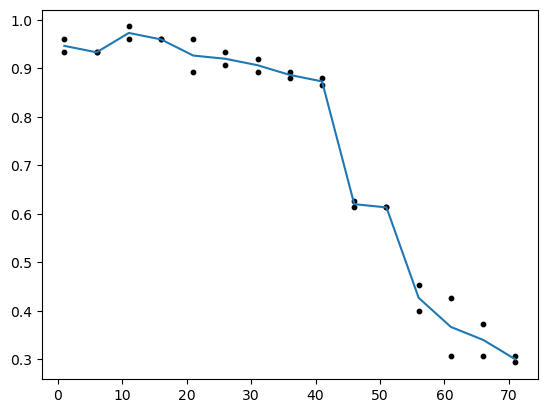

In [155]:
fig = plt.figure()
ax = fig.add_subplot(111)
k = range(1,72,5)

ax.scatter(k, ab_accuracy, color='k', s=10)
ax.scatter(k, ba_accuracy, color='k', s=10)
ax.plot(k, mean_accuracy)

<!-- END QUESTION -->

## Bonus (not extra credit)
Modify the original scatter plot to plot the k nearest neighbors of a reference point you choose.   
Try varying your reference point and k so see how nearest neighbors change.  
  
Remember the classifier is considering distances between 4 different variables, so the nearest neighbors may not be the closest points to the reference in a single plot.  
But overall, points which are closest to the reference when considering all 4 numerical variables should be selected in the neighborhood  

Here is an example for k=5.<br>
Note that some plots don't have all 5 neighbors because some points overlap
  
<img src ='bonus.png' width="900px" /><br><br>
<br>


<!-- BEGIN QUESTION -->



In [156]:
...

Ellipsis

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)